
## Time Series data 

* traditional


In [1]:

## !pip install seaborn
## !pip install matplotlib
## !pip install hvplot
## !pip install PyViz
## !pip install statsmodels
## !pip install scikit-learn



In [2]:

import pandas as pd
import numpy as np

import hvplot.pandas
import hvplot

import matplotlib.pyplot as plt

from statsmodels.datasets import co2, get_rdataset
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.filters.hp_filter import hpfilter


In [88]:

import sklearn
import statsmodels
import statsmodels as sm

import warnings

from statsmodels.tsa.api import (kpss, adfuller, seasonal_decompose, STL)
from statsmodels.tools.eval_measures import rmspe, rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_percentage_error as mape

from itertools import product

from pandas.plotting import autocorrelation_plot

warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = [12, 5]  



## CIVS time series data


In [4]:

df_data = pd.read_csv('data/RealSeqData.CIVS.Nov.2023.csv')


In [5]:

df_data.head()


,time,THEORETICAL_TONNAGE,Coke_Rate,HOT_BLAST_TMP_NORTH_SOUTH,BF_WINDRATE,SNORT_VALVE_POSITION,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,...,BF14_material_8_weight_a,BF14_material_8_weight_b,BF14_material_9_weight_a,BF14_material_9_weight_b,BF14_material_10_weight_a,BF14_material_10_weight_b,NE_Uptake_Temp,SE_Uptake,NE_Uptake,SW_Uptake
0,8/1/21 0:00,6006,992,1999.604384,179.7496382,98.33429718,4.997584786,8.084516915,2.510679501,0,...,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.6341754,145.3965382,220.7173486
1,8/1/21 0:01,6006,992,2000.288837,179.7659446,98.33429718,5.000530552,8.079545175,2.489380854,0,...,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.4592171,145.5708951,226.3606003
2,8/1/21 0:02,6006,992,1999.242862,179.7822511,98.33429718,5.003476318,8.074573435,2.489036886,0,...,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.6457359,145.745252,230.2975397
3,8/1/21 0:03,6006,992,1999.884442,179.7984904,98.33429718,5.006422084,8.069601695,2.49686719,0,...,0,0,21108.33333,562140,8918.666667,212980,161.955355,247.987563,145.9196089,225.2202915
4,8/1/21 0:04,6006,992,1999.849729,179.7844299,98.33429718,5.009367851,8.064629955,2.501961434,0,...,0,0,21105.00000,562140,8884.000000,212980,163.1027365,226.923719,146.0939658,218.8276934


In [6]:

ts_data = pd.read_csv(
            'data/RealSeqData.CIVS.Nov.2023.csv',
            header=0,
            parse_dates = ['time'],
            index_col=0,
            infer_datetime_format=True
)


In [7]:

ts_data.head(5)


,THEORETICAL_TONNAGE,Coke_Rate,HOT_BLAST_TMP_NORTH_SOUTH,BF_WINDRATE,SNORT_VALVE_POSITION,i_COLD_BLAST_MOISTURE,HOST_BLAST_MOISTURE,HIGH_PURITY_OXYGEN,COAL_FLOW,NAT_GAS_INJECTION,...,BF14_material_8_weight_a,BF14_material_8_weight_b,BF14_material_9_weight_a,BF14_material_9_weight_b,BF14_material_10_weight_a,BF14_material_10_weight_b,NE_Uptake_Temp,SE_Uptake,NE_Uptake,SW_Uptake
time,,,,,,,,,,,,,,,,,,,,,
2021-08-01 00:00:00,6006,992,1999.604384,179.7496382,98.33429718,4.997584786,8.084516915,2.510679501,0,4034.234339,...,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.6341754,145.3965382,220.7173486
2021-08-01 00:01:00,6006,992,2000.288837,179.7659446,98.33429718,5.000530552,8.079545175,2.489380854,0,4024.947376,...,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.4592171,145.5708951,226.3606003
2021-08-01 00:02:00,6006,992,1999.242862,179.7822511,98.33429718,5.003476318,8.074573435,2.489036886,0,4011.601682,...,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.6457359,145.745252,230.2975397
2021-08-01 00:03:00,6006,992,1999.884442,179.7984904,98.33429718,5.006422084,8.069601695,2.49686719,0,4012.024633,...,0,0,21108.33333,562140,8918.666667,212980,161.955355,247.987563,145.9196089,225.2202915
2021-08-01 00:04:00,6006,992,1999.849729,179.7844299,98.33429718,5.009367851,8.064629955,2.501961434,0,4000.467204,...,0,0,21105.00000,562140,8884.000000,212980,163.1027365,226.923719,146.0939658,218.8276934


In [8]:

ts_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265020 entries, 2021-08-01 00:00:00 to 2022-01-31 23:59:00
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   THEORETICAL_TONNAGE            265020 non-null  int64  
 1   Coke_Rate                      265020 non-null  int64  
 2   HOT_BLAST_TMP_NORTH_SOUTH      265020 non-null  object 
 3   BF_WINDRATE                    265020 non-null  object 
 4   SNORT_VALVE_POSITION           265020 non-null  object 
 5   i_COLD_BLAST_MOISTURE          265020 non-null  object 
 6   HOST_BLAST_MOISTURE            265020 non-null  object 
 7   HIGH_PURITY_OXYGEN             265020 non-null  object 
 8   COAL_FLOW                      265020 non-null  object 
 9   NAT_GAS_INJECTION              265020 non-null  object 
 10  i_HOT_BLAST_PRESSURE           265020 non-null  object 
 11  TOP_PRESS                      265020 non-null  object 
 

<AxesSubplot:xlabel='time'>

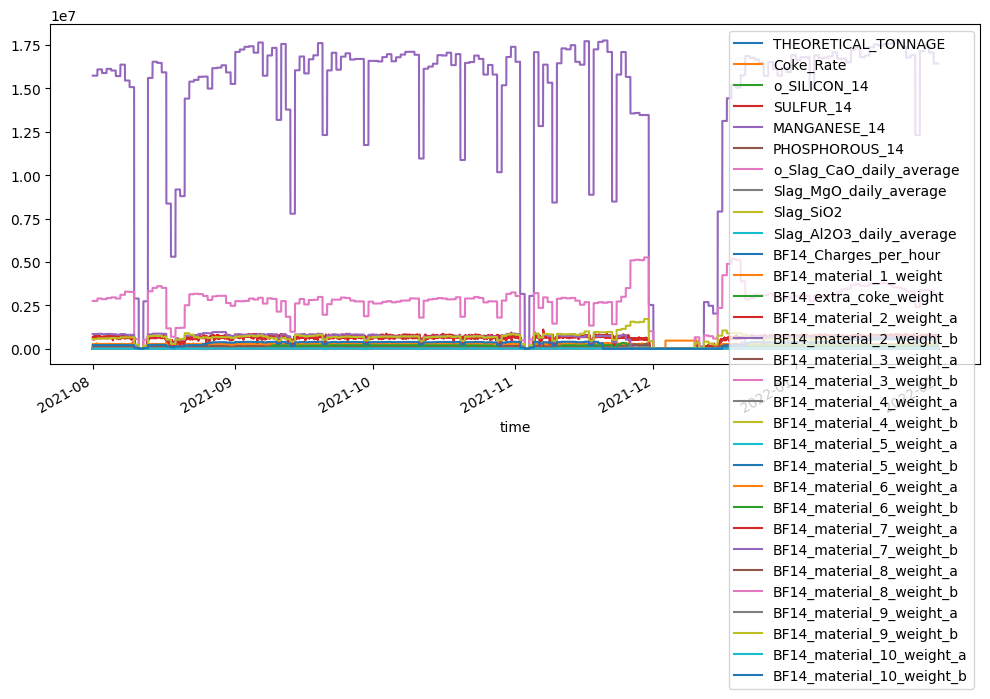

In [9]:

ts_data.plot()


In [10]:

## ts_data.hvplot()


array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabe

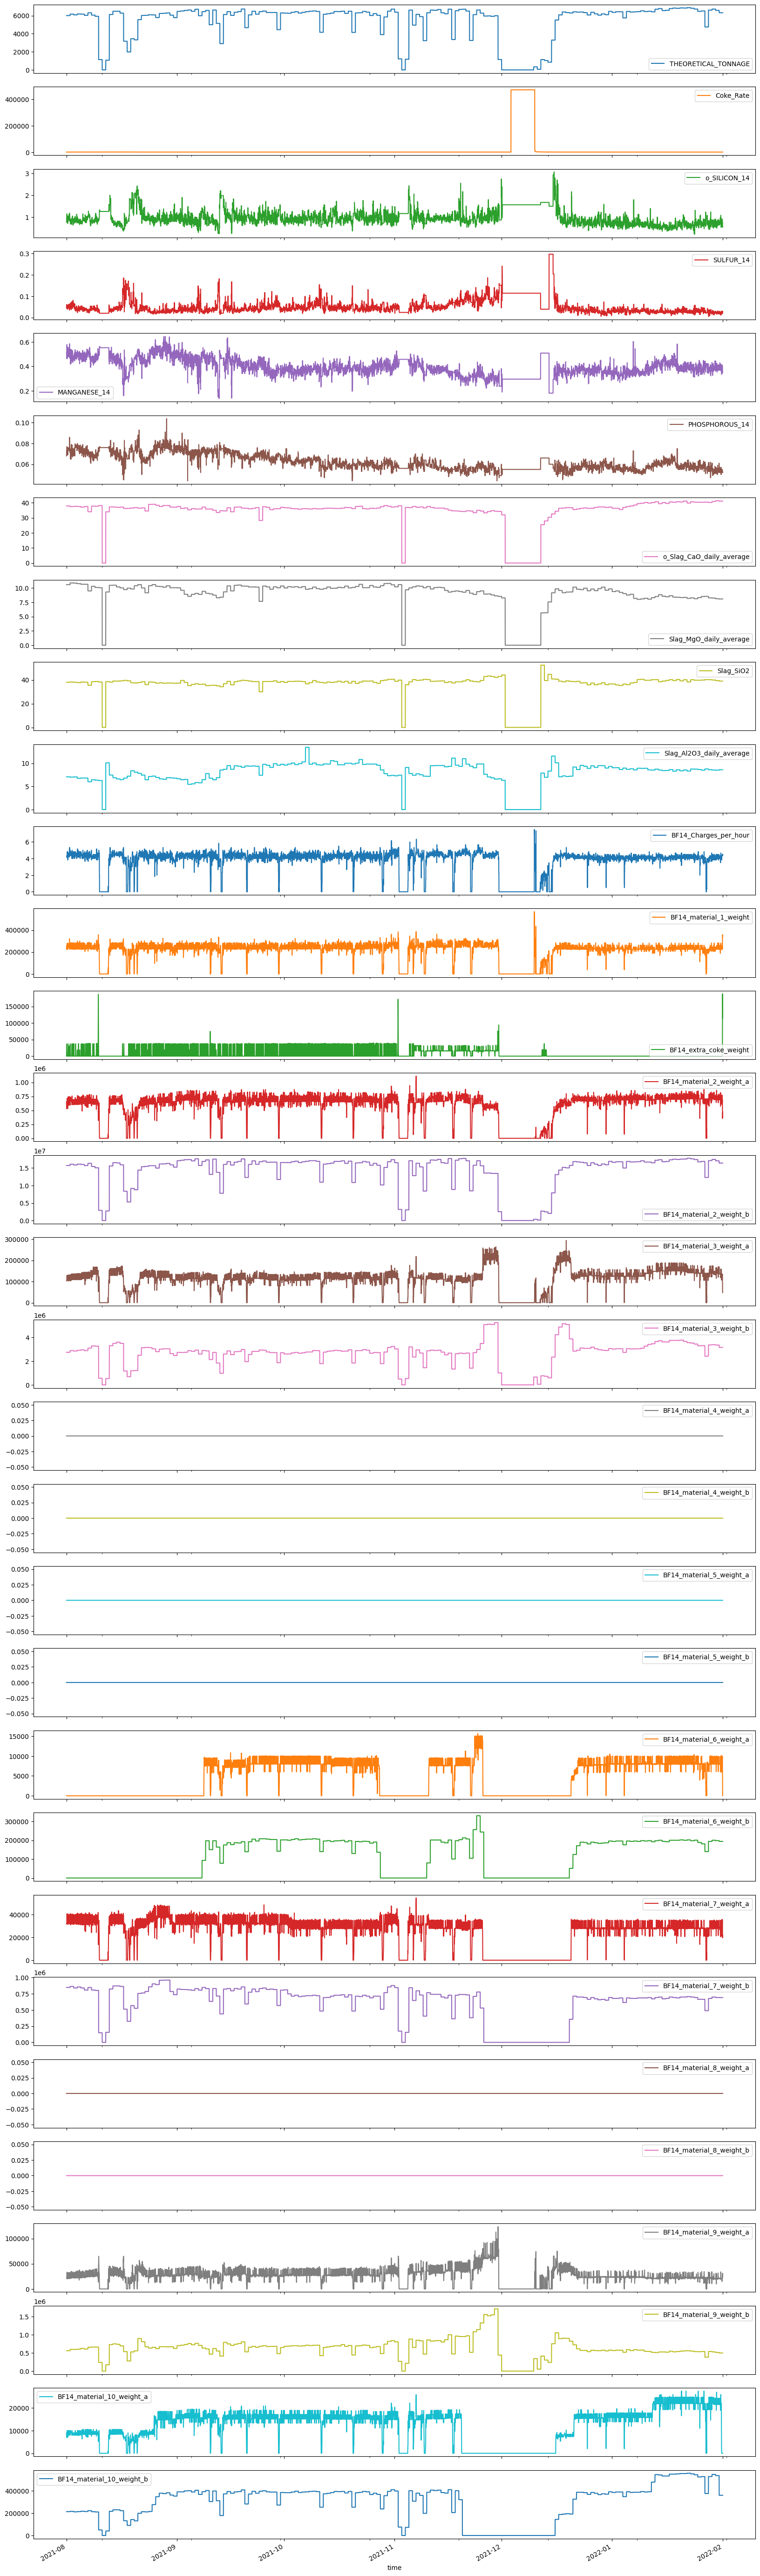

In [11]:

ts_data.plot( figsize=(20,80),  subplots=True   )


In [12]:

## ts_data.hvplot( width=300,  subplots=True   ).cols(3)


In [14]:

## (ts_data['o_SILICON_14'].hvplot(width=400) + ts_data['NAT_GAS_INJECTION'].hvplot(width=400))



## Split Time Series Data


In [15]:

def split_data(data, test_split):
    l = len(data)
    t_idx = round(l*(1-test_split))
    train, test = data[ : t_idx], data[t_idx : ]
    print(f'train: {len(train)} , test: {len(test)}')
    return train, test


In [16]:

test_split = 0.20

ts_data_train, ts_data_test = split_data(ts_data, test_split)



train: 212016 , test: 53004


In [17]:

ts_data_train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 212016 entries, 2021-08-01 00:00:00 to 2021-12-26 04:35:00
Data columns (total 56 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   THEORETICAL_TONNAGE            212016 non-null  int64  
 1   Coke_Rate                      212016 non-null  int64  
 2   HOT_BLAST_TMP_NORTH_SOUTH      212016 non-null  object 
 3   BF_WINDRATE                    212016 non-null  object 
 4   SNORT_VALVE_POSITION           212016 non-null  object 
 5   i_COLD_BLAST_MOISTURE          212016 non-null  object 
 6   HOST_BLAST_MOISTURE            212016 non-null  object 
 7   HIGH_PURITY_OXYGEN             212016 non-null  object 
 8   COAL_FLOW                      212016 non-null  object 
 9   NAT_GAS_INJECTION              212016 non-null  object 
 10  i_HOT_BLAST_PRESSURE           212016 non-null  object 
 11  TOP_PRESS                      212016 non-null  object 
 

In [18]:

ts_data_test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53004 entries, 2021-12-26 04:36:00 to 2022-01-31 23:59:00
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   THEORETICAL_TONNAGE            53004 non-null  int64  
 1   Coke_Rate                      53004 non-null  int64  
 2   HOT_BLAST_TMP_NORTH_SOUTH      53004 non-null  object 
 3   BF_WINDRATE                    53004 non-null  object 
 4   SNORT_VALVE_POSITION           53004 non-null  object 
 5   i_COLD_BLAST_MOISTURE          53004 non-null  object 
 6   HOST_BLAST_MOISTURE            53004 non-null  object 
 7   HIGH_PURITY_OXYGEN             53004 non-null  object 
 8   COAL_FLOW                      53004 non-null  object 
 9   NAT_GAS_INJECTION              53004 non-null  object 
 10  i_HOT_BLAST_PRESSURE           53004 non-null  object 
 11  TOP_PRESS                      53004 non-null  object 
 12  TOP_TEMP_HI


## Utility Functions


In [19]:

def check_stationarity(df):
    
    results = adfuller(df)[1:3]
    s = 'Non-Stationary'
    if results[0] < 0.05:
        s = 'Stationary'
        
    print(f"'{s}\t p-value:{results[0]} \t lags:{results[1]}")
    
    return (s, results[0])


In [20]:

def get_best_model(score, c='AIC'):
    
    initial_score = score[0][c]
    best_model = 0
    for k,v in score.items():
        if v[c] < initial_score:
            initial_score = v[c]
            best_model = k
            
    print(f'Best model: {best_model} with lowest {c} score: {initial_score}')
    
    return score[best_model]['model']


In [21]:

def plot_forecast(model, start, train, test):
    forecast = pd.DataFrame(model.forecast(test.shape[0]), 
                            index=test.index)
    ax = train.loc[start:].plot(style='--')
    test.plot(ax=ax)
    forecast.plot(ax=ax, style = '-.')
    ax.legend(['orig_train', 'orig_test', 'forecast'])
    # plt.show()
    return ax


In [22]:

def combinator(items, r=1):
    combo = [i for i in product(*items, repeat=r)]
    return combo



## Blast 14 all data



## Silicon data only


In [23]:

plt.rcParams["figure.figsize"] = (10, 3)


In [24]:


ts_silicon_data = pd.read_csv(
            'data/RealSeqData.CIVS.Nov.2023.csv',
            header=0,
            parse_dates = ['time'],
            index_col=0,
            infer_datetime_format=True,
            usecols=['time', 'o_SILICON_14']
)


In [25]:

ts_silicon_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 265020 entries, 2021-08-01 00:00:00 to 2022-01-31 23:59:00
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   o_SILICON_14  265020 non-null  float64
dtypes: float64(1)
memory usage: 4.0 MB


<AxesSubplot:xlabel='time'>

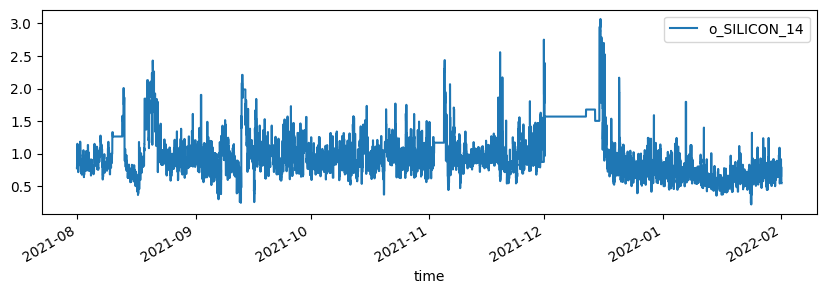

In [26]:

ts_silicon_data.plot()



## Silicon Trend, Seasonality, and residual


In [27]:

## ts_silicon_data_decomposed = seasonal_decompose(ts_silicon_data, model='multiplicative')

silicon_cyclic, silicon_trend = hpfilter(ts_silicon_data)


<AxesSubplot:title={'center':'Silicon Trend Component'}, xlabel='time'>

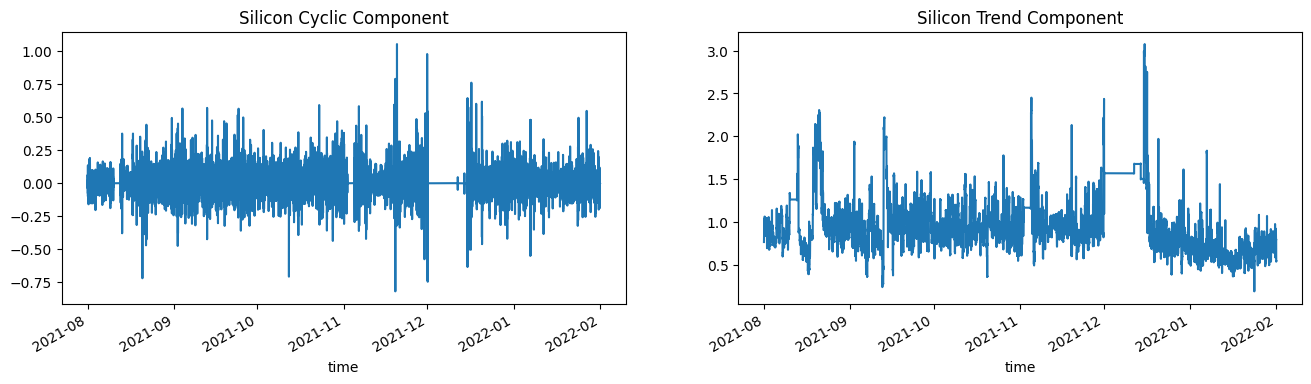

In [28]:



fig, ax = plt.subplots(1,2, figsize=(16, 4))

silicon_cyclic.plot(ax=ax[0], title='Silicon Cyclic Component')
silicon_trend.plot(ax=ax[1], title='Silicon Trend Component')

#fig.savefig('images/fig_9.18.png', bbox_inches='tight')



<AxesSubplot:xlabel='time'>

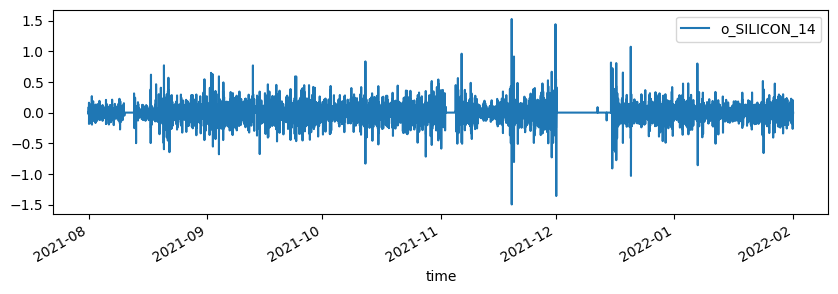

In [29]:

ts_silicon_data_diff = ts_silicon_data.diff().dropna()
ts_silicon_data_diff.plot()




## Silicon Plotting ACF and PACF


In [30]:

# plt.rcParams["figure.figsize"] = [16, 4]

## ts_data_train.plot()



In [31]:

check_stationarity( ts_silicon_data_diff )


'Stationary	 p-value:0.0 	 lags:87


('Stationary', 0.0)

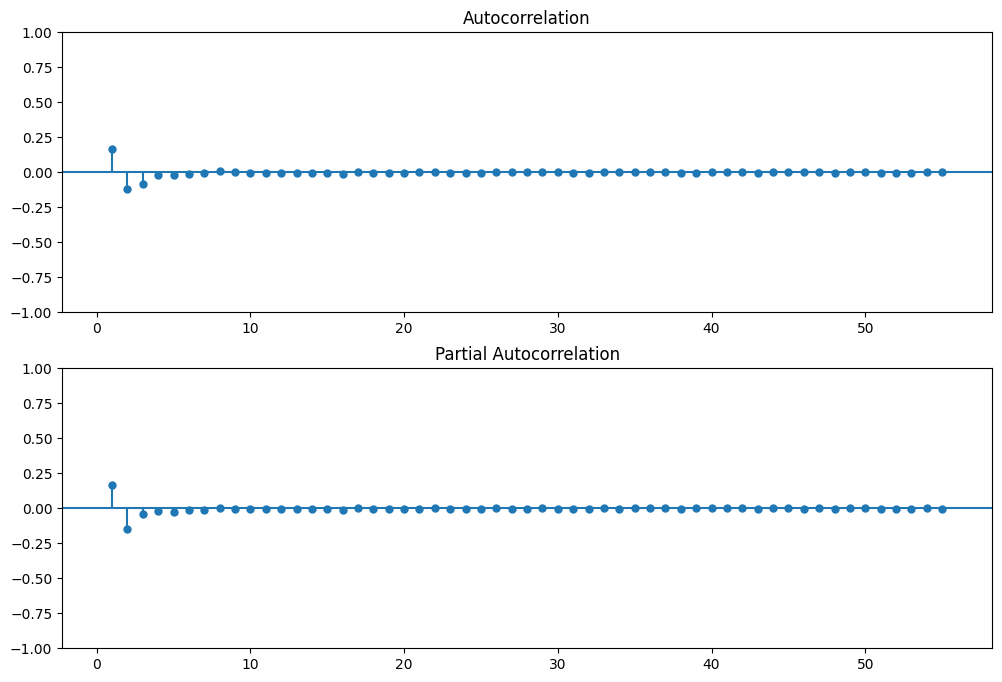

In [32]:

fig, ax = plt.subplots(2,1, figsize=(12,8))

plot_acf( ts_silicon_data_diff, zero=False, ax=ax[0])
plot_pacf(ts_silicon_data_diff, zero=False, ax=ax[1])

#plt.savefig('images/fig_10.2.png', bbox_inches='tight', dpi=300)

plt.show()


In [47]:


ts_silicon_data_diff_12 = ts_silicon_data.diff(12).dropna()


In [48]:

check_stationarity(ts_silicon_data_diff_12)


'Stationary	 p-value:0.0 	 lags:86


('Stationary', 0.0)

In [49]:

ts_silicon_data_diff_12_1 = ts_silicon_data.diff(12).diff(1).dropna()
check_stationarity(ts_silicon_data_diff_12_1)


'Stationary	 p-value:0.0 	 lags:86


('Stationary', 0.0)

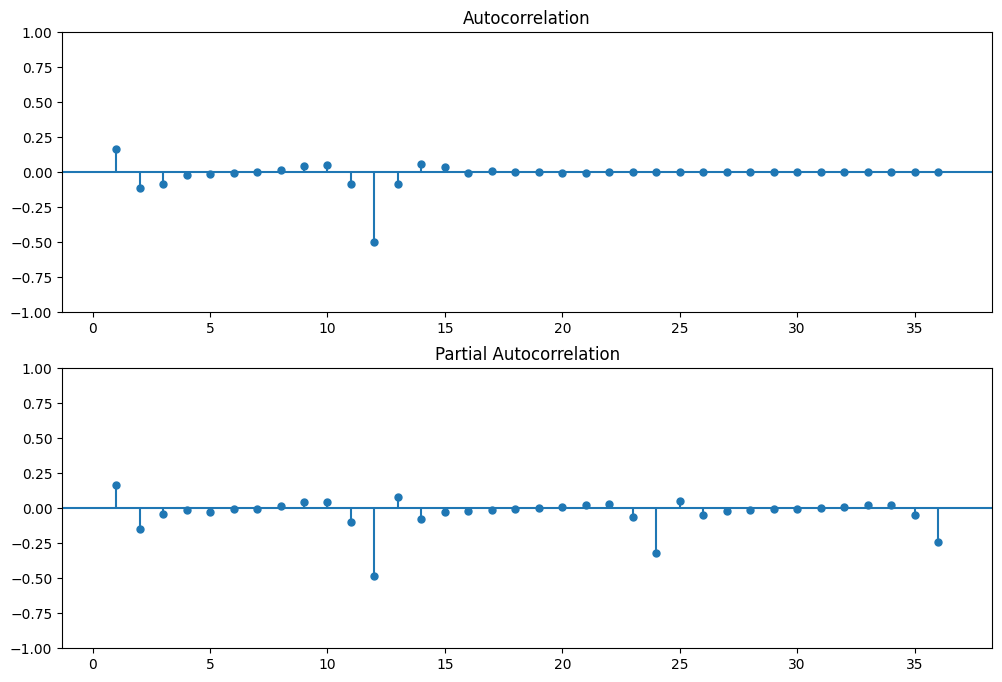

In [50]:

fig, ax = plt.subplots(2,1, figsize=(12,8))

plot_acf( ts_silicon_data_diff_12_1, zero=False, ax=ax[0], lags=36)
plot_pacf(ts_silicon_data_diff_12_1, zero=False, ax=ax[1], lags=36)

# plt.savefig('images/fig_10.3.png', bbox_inches='tight', dpi=300)
plt.show()



## Silicon SARIMAX


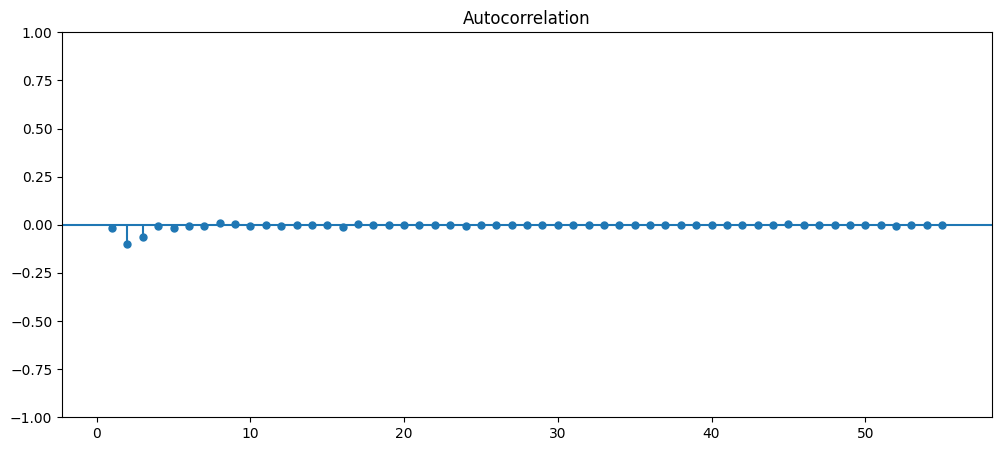

In [52]:



model = SARIMAX(
                 ts_silicon_data, 
                 order=(0,1,1),
                 seasonal_order=(0,1,1, 12) 
).fit(disp=False)

plot_acf(model.resid[1:], zero=False)

#plt.savefig('images/fig_10.4.png', bbox_inches='tight', dpi=300)

plt.show()


<AxesSubplot:xlabel='time'>

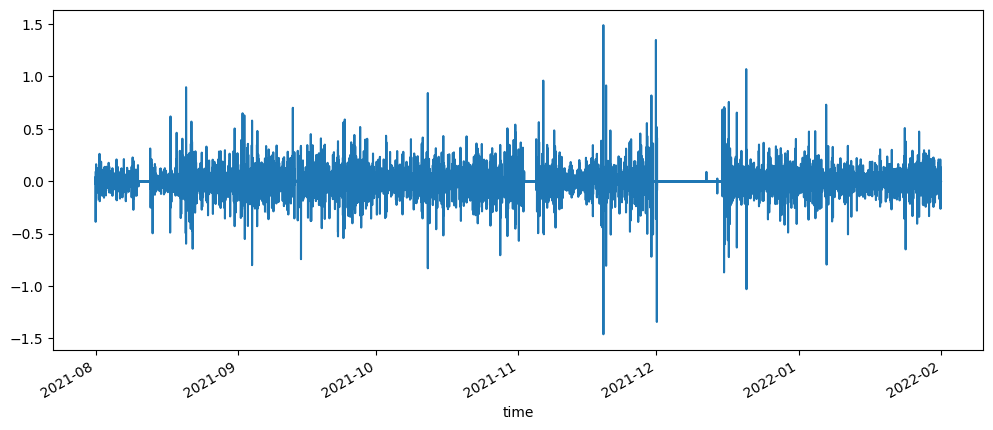

In [53]:

model.resid[1:].plot()


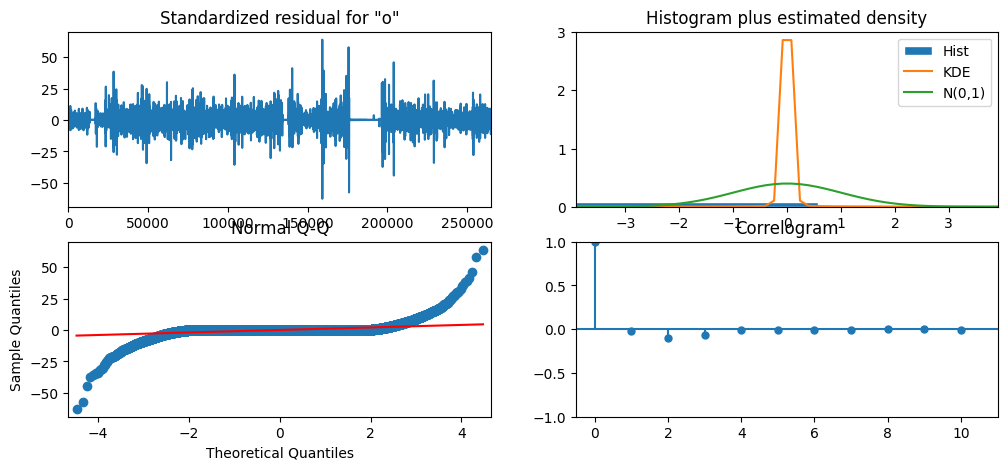

In [54]:

model.plot_diagnostics();


In [55]:

model.resid[1:]


time
2021-08-01 00:01:00   -8.924450e-11
2021-08-01 00:02:00    0.000000e+00
2021-08-01 00:03:00    0.000000e+00
2021-08-01 00:04:00    0.000000e+00
2021-08-01 00:05:00    0.000000e+00
                           ...     
2022-01-31 23:55:00   -1.900537e-04
2022-01-31 23:56:00    3.985625e-04
2022-01-31 23:57:00   -4.542628e-04
2022-01-31 23:58:00    6.417655e-04
2022-01-31 23:59:00    3.587740e-04
Length: 265019, dtype: float64


## Silicon Forecasting Univariate Time Series Data with Exponential Smoothing


In [61]:

trend = ['add', 'mul']
damped = [True, False]

silicon_ex_comb = combinator([trend, damped])

silicon_ex_comb


[('add', True), ('add', False), ('mul', True), ('mul', False)]


## Split silicon data train test 


In [62]:

test_split = 0.20

ts_silicon_data_train, ts_silicon_data_test = split_data(ts_silicon_data, test_split)



train: 212016 , test: 53004


In [63]:



train_silicon = ts_silicon_data_train.values.ravel()
y_silicon     = ts_silicon_data_test.values.ravel()

score = {}
for i, (t, dp) in enumerate(silicon_ex_comb):
    
    exp = ExponentialSmoothing(train_silicon, 
                     trend=t, 
                     damped_trend=dp,
                     seasonal=None)
    
    model = exp.fit(use_brute=True, optimized=True)    
    y_hat = model.forecast( len(y_silicon) )
    
    score[i] = {'trend':t, 
                'damped':dp,
                'AIC':model.aic,
                'BIC':model.bic, 
                'AICc':model.aicc, 
                'RMSPE': rmspe(y_silicon, y_hat),
                'RMSE' : rmse( y_silicon, y_hat),
                'MAPE' : mape( y_silicon, y_hat),
                'model': model}


In [64]:

silicon_best_model = get_best_model(score, 'AIC')


Best model: 3 with lowest AIC score: -1574563.0650400803


In [65]:

silicon_best_model.summary()


Dep. Variable:,endog,No. Observations:,212016
Model:,ExponentialSmoothing,SSE,126.186
Optimized:,True,AIC,-1574563.065
Trend:,Multiplicative,BIC,-1574522.007
Seasonal:,None,AICC,-1574563.065
Seasonal Periods:,None,Date:,"Sat, 25 Nov 2023"
Box-Cox:,False,Time:,16:57:52
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,2.8169e-16,beta,True


In [66]:

silicon_best_model.params_formatted


,name,param,optimized
smoothing_level,alpha,1.000000e+00,True
smoothing_trend,beta,2.816899e-16,True
initial_level,l.0,7.781089e-01,True
initial_trend,b.0,9.997564e-01,True


<AxesSubplot:xlabel='time'>

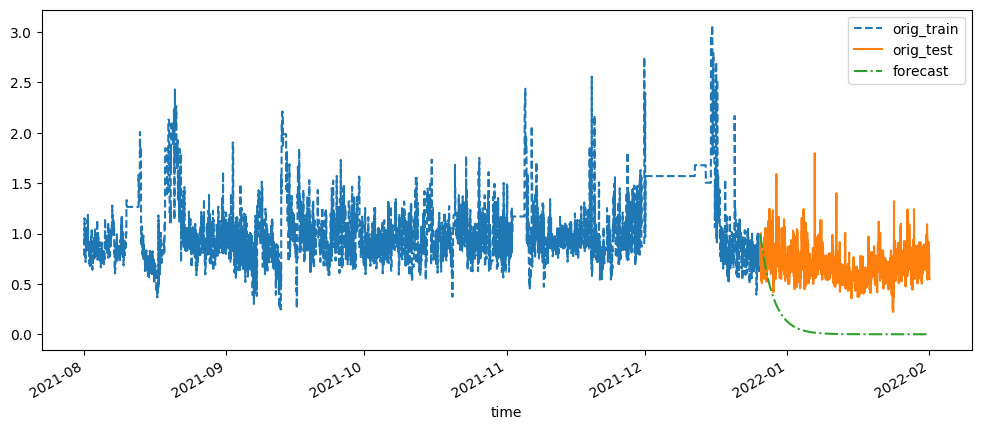

In [69]:

plot_forecast(silicon_best_model, '2017', ts_silicon_data_train, ts_silicon_data_test)

#plt.savefig('images/fig_10.6.png', bbox_inches='tight', dpi=300)


In [70]:

trend , damped    = ['add', 'mul'], [True, False] 
seasonal, periods = ['add' , 'mul'], [4, 6, 12]

silicon_exp_comb = combinator([trend, damped, seasonal, periods])


In [71]:

len(silicon_exp_comb)


24

In [73]:

train_silicon = ts_silicon_data_train.values.ravel()
y_silicon     = ts_silicon_data_test.values.ravel()

silicon_model_scores = {}

for i, (t, dp, s, sp) in enumerate(silicon_exp_comb):
    exp = ExponentialSmoothing(train_silicon, 
                        trend=t, 
                        damped_trend=dp,
                        seasonal=s,
                        seasonal_periods=sp)
    
    model = exp.fit(use_brute=True, optimized=True)   
    
    y_hat = model.forecast(len(y_silicon))
    silicon_model_scores[i] = {'trend':t,
                'damped':dp,
                'AIC':model.aic,
                'BIC':model.bic, 
                'AICc': model.aicc,
                'RMSPE': rmspe(y_silicon, y_hat),
                'RMSE' : rmse( y_silicon, y_hat),
                'MAPE' : mape( y_silicon, y_hat),
                'model': model}


In [74]:

silicon_model = get_best_model(silicon_model_scores)


Best model: 18 with lowest AIC score: -1574601.2895855443


In [75]:

silicon_model.summary()


Dep. Variable:,endog,No. Observations:,212016
Model:,ExponentialSmoothing,SSE,126.158
Optimized:,True,AIC,-1574601.290
Trend:,Multiplicative,BIC,-1574519.174
Seasonal:,Additive,AICC,-1574601.289
Seasonal Periods:,4,Date:,"Sat, 25 Nov 2023"
Box-Cox:,False,Time:,17:52:16
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,2.698e-11,beta,True


<AxesSubplot:xlabel='time'>

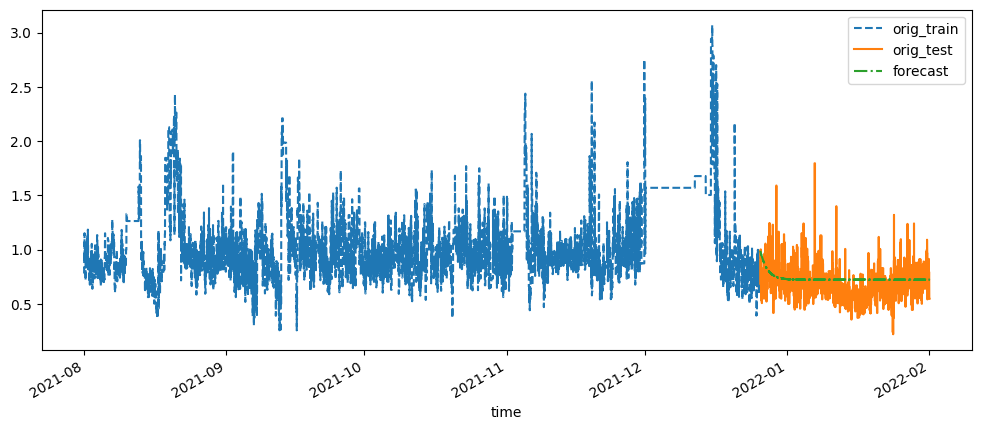

In [77]:

plot_forecast(silicon_model, '1969', ts_silicon_data_train, ts_silicon_data_test)
# plt.savefig('images/fig_10.8.png', bbox_inches='tight', dpi=300)



## Silicon  Time Series Data with Non-Seasonal ARIMA


In [78]:

plt.rcParams["figure.figsize"] = [14, 4] 


In [80]:

'''
decomposed = seasonal_decompose(ts_silicon_data)
decomposed.plot()
#plt.savefig('images/fig_10.10.png', bbox_inches='tight', dpi=300)
plt.show()

'''



"\ndecomposed = seasonal_decompose(ts_silicon_data)\ndecomposed.plot()\n#plt.savefig('images/fig_10.10.png', bbox_inches='tight', dpi=300)\nplt.show()\n\n"

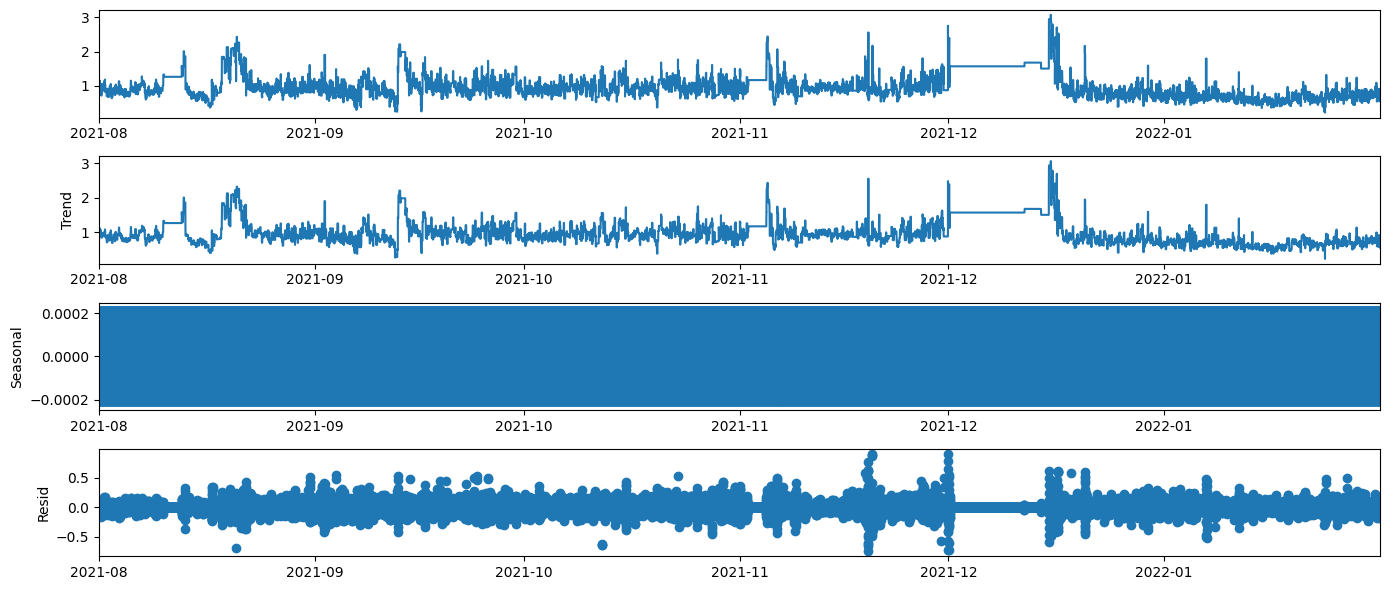

In [82]:

plt.rcParams["figure.figsize"] = [14, 6]  

decomposed = seasonal_decompose(ts_silicon_data, period=12)
decomposed.plot(); plt.show()


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

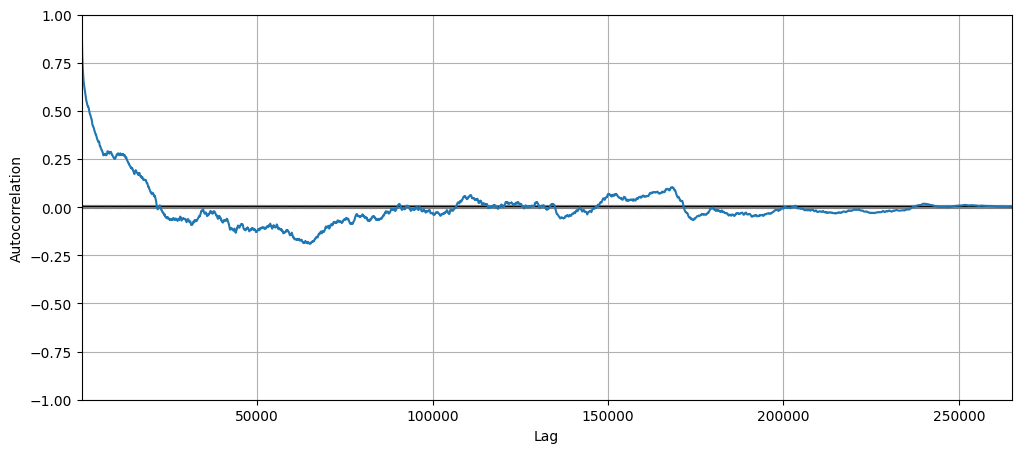

In [85]:

autocorrelation_plot(ts_silicon_data)


In [86]:

check_stationarity(ts_silicon_data)


'Stationary	 p-value:6.395534091147097e-25 	 lags:87


('Stationary', 6.395534091147097e-25)

In [87]:

ts_silicon_data_df1 = ts_silicon_data.diff().dropna()
check_stationarity(ts_silicon_data_df1)


'Stationary	 p-value:0.0 	 lags:87


('Stationary', 0.0)

<AxesSubplot:xlabel='time'>

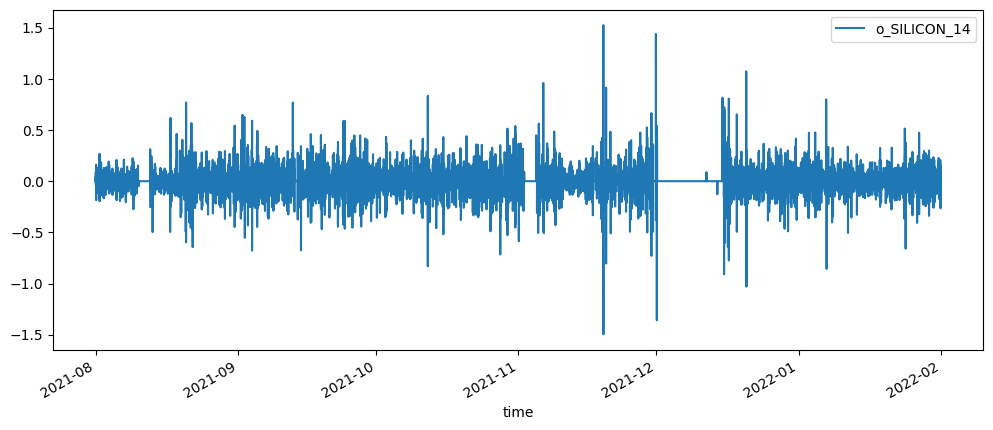

In [89]:

ts_silicon_data_df1.plot()
#plt.savefig('images/fig_10.11.png', bbox_inches='tight', dpi=300)


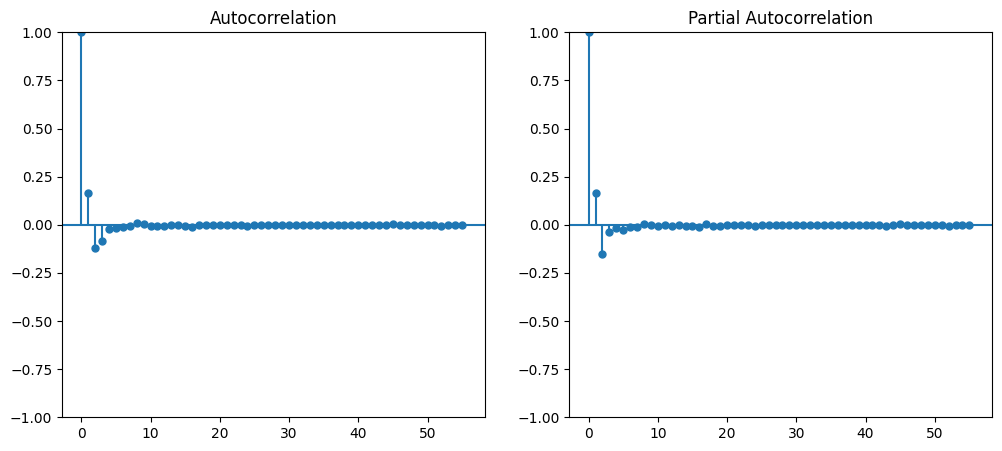

In [90]:

fig, ax = plt.subplots(1,2)

plot_acf( ts_silicon_data_df1, ax=ax[0])
plot_pacf(ts_silicon_data_df1, ax=ax[1])
#plt.savefig('images/fig_10.12.png', bbox_inches='tight', dpi=300)
plt.show()


In [91]:

(acorr_ljungbox(ts_silicon_data_df1, 
                lags=25,
                return_df=True) < 0.05)['lb_pvalue'].sum()



25

In [92]:

## ts_silicon_data_train, ts_silicon_data_test

model = ARIMA(ts_silicon_data_train, order=(0,1,1))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           o_SILICON_14   No. Observations:               212016
Model:                 ARIMA(0, 1, 1)   Log Likelihood              490103.113
Date:                Sat, 25 Nov 2023   AIC                        -980202.226
Time:                        18:09:53   BIC                        -980181.697
Sample:                             0   HQIC                       -980196.199
                             - 212016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2061      0.000    747.317      0.000       0.206       0.207
sigma2         0.0006   1.12e-07   5143.213      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  65.18   Jarque-Bera (JB):        2262734282.98
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                       509.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:

(acorr_ljungbox(results.resid, 
                lags=25,
                return_df=True) < 0.05)['lb_pvalue'].sum()


25

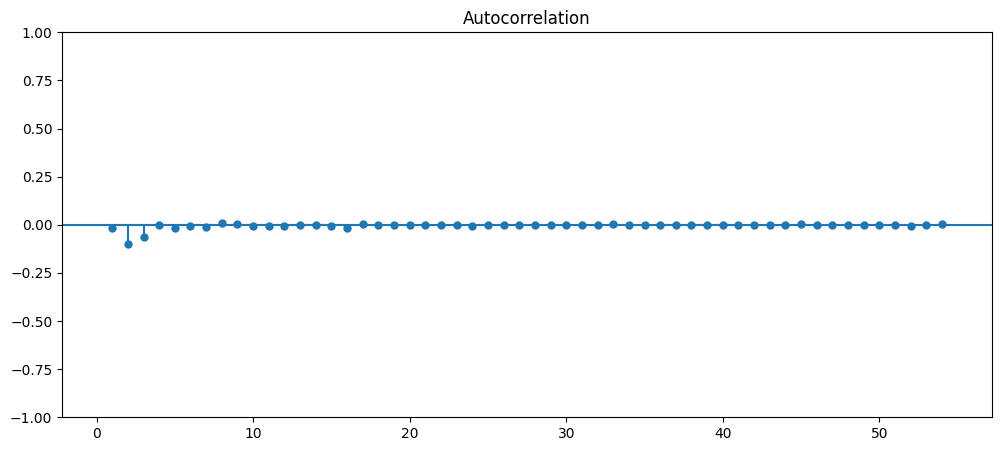

In [94]:

plot_acf(results.resid, zero=False);plt.show()


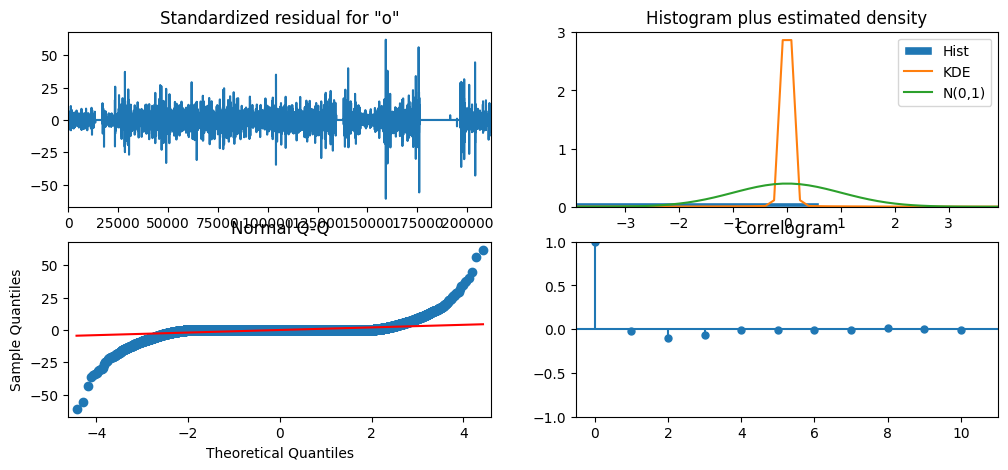

In [95]:

results.plot_diagnostics()
#plt.savefig('images/fig_10.15.png', bbox_inches='tight', dpi=300)
plt.show()


In [96]:

(acorr_ljungbox(results.resid, 
                lags=25,
                return_df=True) < 0.05)['lb_pvalue'].sum()


25

In [97]:

from scipy.stats import shapiro
shapiro(results.resid)[1] < 0.05


True

<AxesSubplot:xlabel='time'>

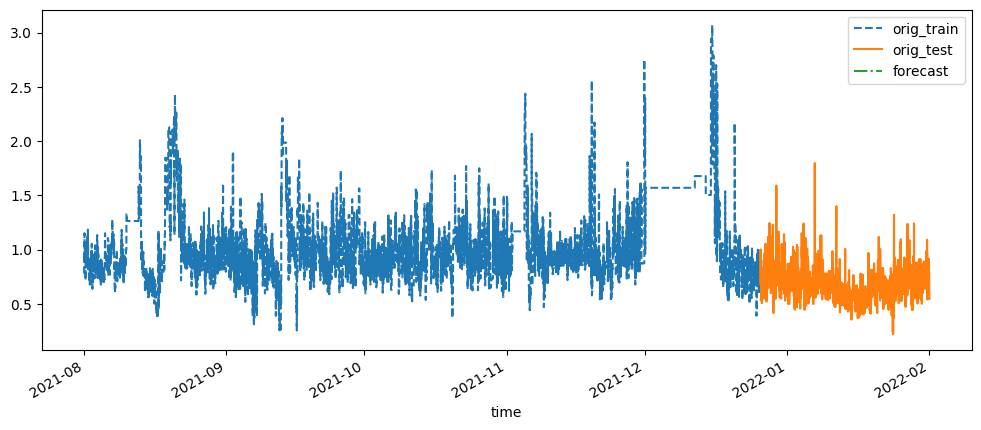

In [98]:



plot_forecast(results, '1998', ts_silicon_data_train, ts_silicon_data_test)



## Another try


In [99]:

## ts_silicon_data_train, ts_silicon_data_test

pv, dv, qv = [list(range(3))]*3
vals = combinator([pv, dv, qv])
score = {}

for i, (p, d, q) in enumerate(vals):
    m = ARIMA(ts_silicon_data_train, order=(p,d,q))
    res = m.fit()
    
    y = ts_silicon_data_test.values.ravel() 
    y_hat = res.forecast(steps=len(y))
    score[i] = {'order': (p,d,q),
                'AIC':res.aic, 
                'BIC': res.bic,
                'AICc':res.aicc,
                'RMSPE': rmspe(y, y_hat),
                'RMSE' : rmse( y, y_hat),
                'MAPE' : mape( y, y_hat),
                'model': res}


In [100]:

get_best_model(score, 'AIC')


Best model: 20 with lowest AIC score: -983635.0357214148


In [101]:

best_m = get_best_model(score, 'AIC')


Best model: 20 with lowest AIC score: -983635.0357214148


In [102]:

score[8]


{'order': (0, 2, 2),
 'AIC': -980041.9559636915,
 'BIC': -980011.1627409238,
 'AICc': -980041.9558504892,
 'RMSPE': 92.5092651779263,
 'RMSE': 5.870836160858952,
 'MAPE': 7.9573970363075,
 'model': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x7f994894a950>}

In [103]:

score[4]['model'].model_orders


{'trend': 0,
 'exog': 0,
 'ar': 0,
 'ma': 1,
 'seasonal_ar': 0,
 'seasonal_ma': 0,
 'reduced_ar': 0,
 'reduced_ma': 1,
 'exog_variance': 0,
 'measurement_variance': 0,
 'variance': 1}

In [104]:

pd.DataFrame(score).T.sort_values(by='AIC').reset_index()


,index,order,AIC,BIC,AICc,RMSPE,RMSE,MAPE,model
0,20,"(2, 0, 2)",-983635.035721,-983573.449219,-983635.035325,6.756009,0.389625,0.592185,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
1,23,"(2, 1, 2)",-983552.349651,-983501.027589,-983552.349368,5.889864,0.336262,0.505646,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
2,22,"(2, 1, 1)",-983496.441737,-983455.384088,-983496.441548,5.889983,0.336269,0.505658,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
3,14,"(1, 1, 2)",-983427.834369,-983386.776719,-983427.83418,5.871056,0.335113,0.503763,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
4,21,"(2, 1, 0)",-983023.814856,-982993.021619,-983023.814743,5.889985,0.336269,0.505658,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
5,25,"(2, 2, 1)",-982847.715698,-982806.658068,-982847.715509,103.659635,6.584515,8.90936,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
6,11,"(1, 0, 2)",-982193.572824,-982142.250739,-982193.572541,6.757423,0.389736,0.592383,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
7,5,"(0, 1, 2)",-981900.23905,-981869.445813,-981900.238937,5.889976,0.336269,0.505657,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
8,19,"(2, 0, 1)",-981321.481414,-981270.159329,-981321.481131,9.12383,0.538672,0.828251,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
9,13,"(1, 1, 1)",-981064.93959,-981034.146353,-981064.939477,5.889973,0.336269,0.505657,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...


In [105]:

pd.DataFrame(score).T.sort_values(by='BIC').reset_index()


,index,order,AIC,BIC,AICc,RMSPE,RMSE,MAPE,model
0,20,"(2, 0, 2)",-983635.035721,-983573.449219,-983635.035325,6.756009,0.389625,0.592185,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
1,23,"(2, 1, 2)",-983552.349651,-983501.027589,-983552.349368,5.889864,0.336262,0.505646,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
2,22,"(2, 1, 1)",-983496.441737,-983455.384088,-983496.441548,5.889983,0.336269,0.505658,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
3,14,"(1, 1, 2)",-983427.834369,-983386.776719,-983427.83418,5.871056,0.335113,0.503763,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
4,21,"(2, 1, 0)",-983023.814856,-982993.021619,-983023.814743,5.889985,0.336269,0.505658,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
5,25,"(2, 2, 1)",-982847.715698,-982806.658068,-982847.715509,103.659635,6.584515,8.90936,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
6,11,"(1, 0, 2)",-982193.572824,-982142.250739,-982193.572541,6.757423,0.389736,0.592383,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
7,5,"(0, 1, 2)",-981900.23905,-981869.445813,-981900.238937,5.889976,0.336269,0.505657,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
8,19,"(2, 0, 1)",-981321.481414,-981270.159329,-981321.481131,9.12383,0.538672,0.828251,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
9,13,"(1, 1, 1)",-981064.93959,-981034.146353,-981064.939477,5.889973,0.336269,0.505657,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...


In [106]:

best_m.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           o_SILICON_14   No. Observations:               212016
Model:                 ARIMA(2, 0, 2)   Log Likelihood              491823.518
Date:                Sat, 25 Nov 2023   AIC                        -983635.036
Time:                        18:22:38   BIC                        -983573.449
Sample:                             0   HQIC                       -983616.955
                             - 212016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0487      0.025     42.048      0.000       1.000       1.098
ar.L1          1.5744      0.003    533.503      0.000       1.569       1.580
ar.L2         -0.5753      0.003   -196.039      0.000      -0.581      -0.570
ma.L1         -0.3971      0.003   -135.676      0.000      -0.403      -0.391
ma.L2         -0.2114      0.001   -388.357      0.000      -0.213      -0.210
sigma2         0.0006   1.29e-07   4390.474      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):        2350336413.54
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.22   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                       518.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='time'>

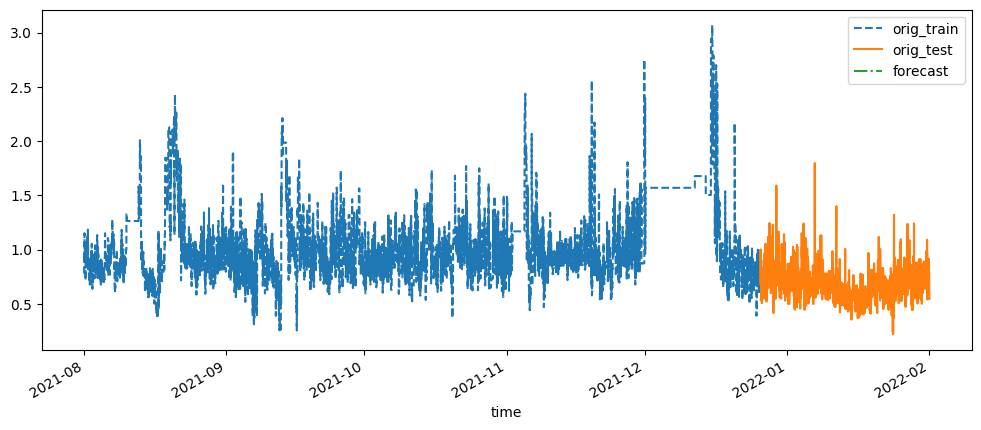

In [107]:

## ts_silicon_data_train, ts_silicon_data_test

plot_forecast(best_m, '1998', ts_silicon_data_train,  ts_silicon_data_test)



## Silicon  Seasonal ARIMA (SARIMAX)


In [108]:


plt.rcParams["figure.figsize"] = [14, 4]  


<AxesSubplot:xlabel='time'>

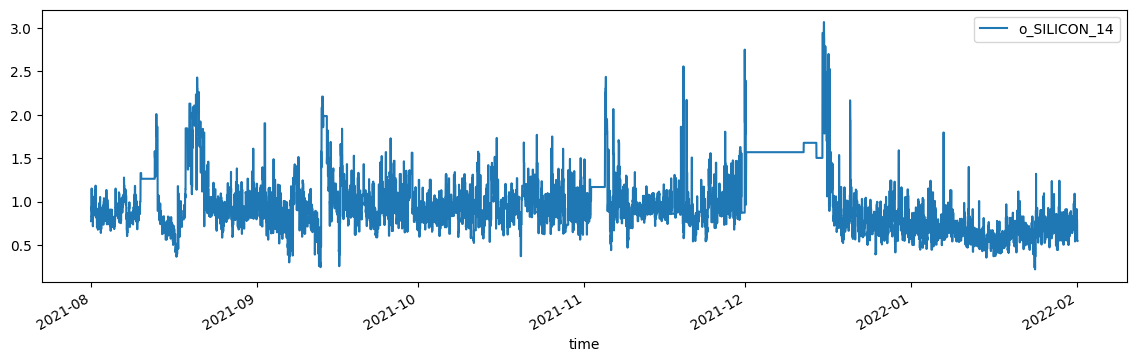

In [109]:

ts_silicon_data.plot()


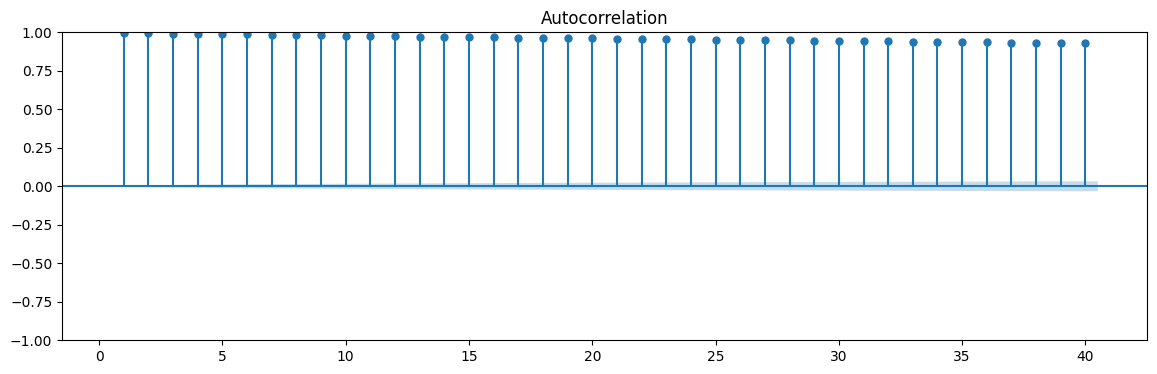

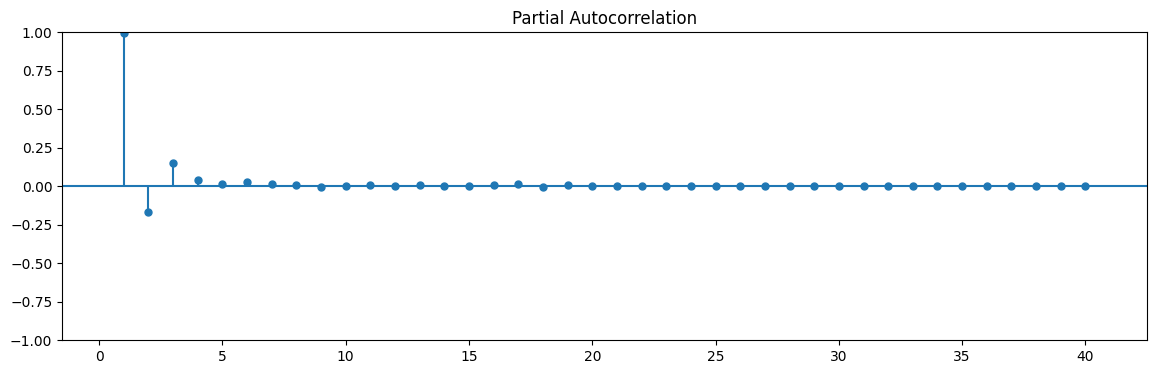

In [111]:

plot_acf( ts_silicon_data, lags=40, zero=False)
plot_pacf(ts_silicon_data, lags=40, zero=False);plt.show()


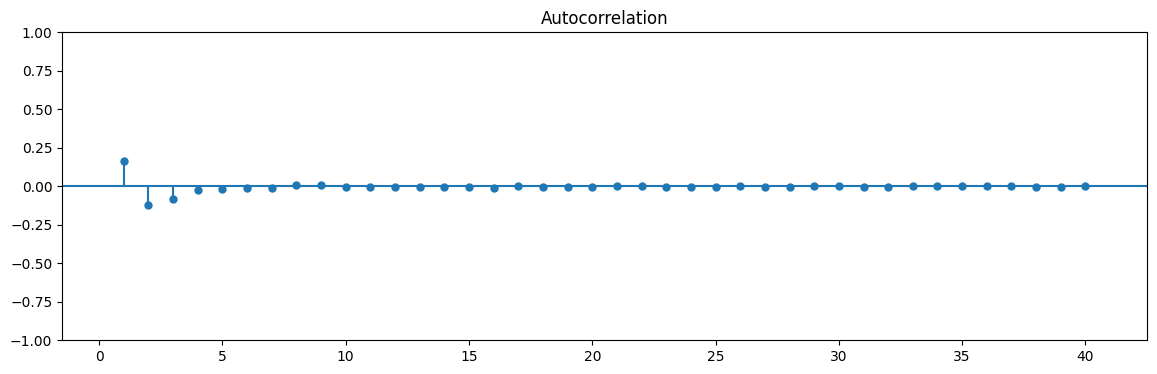

In [112]:

plot_acf(ts_silicon_data.diff(1).dropna(), lags=40, zero=False); plt.show()


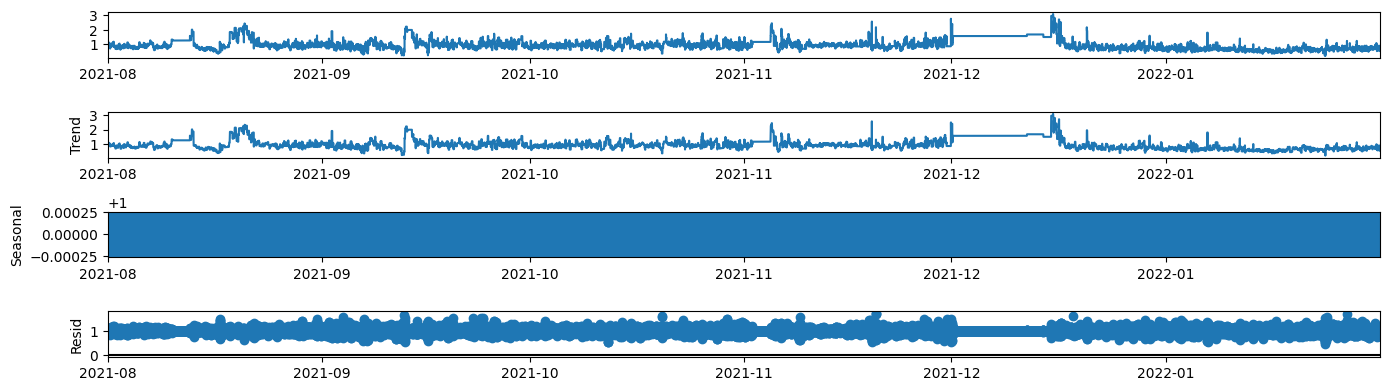

In [113]:

decomposed = seasonal_decompose(ts_silicon_data, period=12, model='multiplicative')
decomposed.plot(); plt.show()


In [114]:

silicon_s = decomposed.seasonal


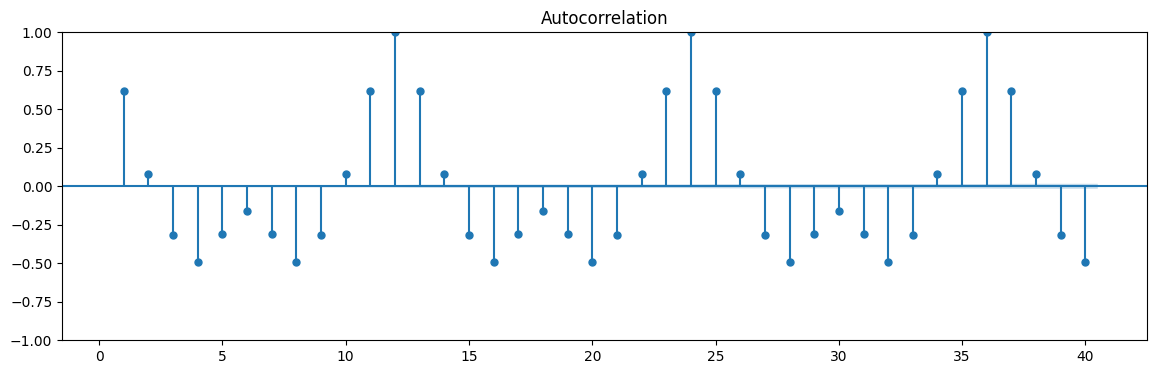

In [115]:

plot_acf(silicon_s, zero=False, lags=40);plt.show()


In [117]:

ts_silicon_data_dif_12   = ts_silicon_data.diff(12).dropna()
ts_silicon_data_dif_12_1 = ts_silicon_data.diff(12).diff(1).dropna()


'Stationary	 p-value:6.395534091147097e-25 	 lags:87
'Stationary	 p-value:0.0 	 lags:86
'Stationary	 p-value:0.0 	 lags:86


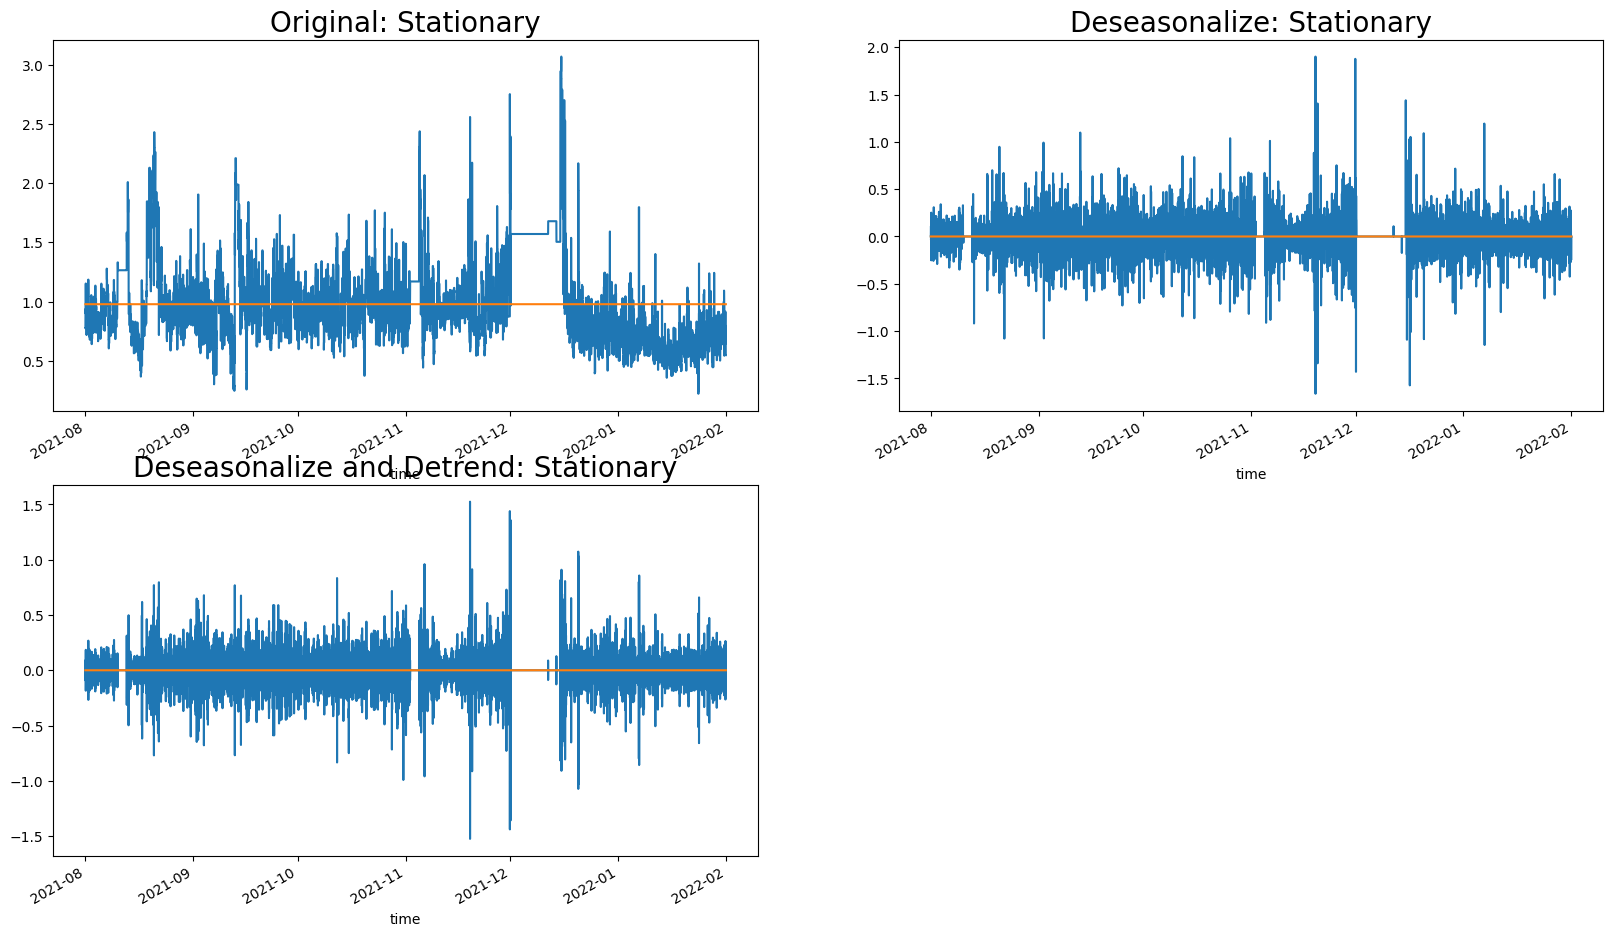

In [118]:

sets = [ts_silicon_data, ts_silicon_data_dif_12, ts_silicon_data_dif_12_1]

desc = ['Original', 'Deseasonalize', 'Deseasonalize and Detrend']
fig, ax = plt.subplots(2,2, figsize=(20,12))

index, l = ts_silicon_data.index, ts_silicon_data.shape[0]

for i, (d_set, d_desc) in enumerate(zip(sets, desc)):
    v, r = i // 2, i % 2
    outcome, pval = check_stationarity(d_set)
    d_set.plot(ax= ax[v,r], title=f'{d_desc}: {outcome}', legend=False)
    pd.Series(d_set.mean().values.tolist()*l, index=index).plot(ax=ax[v,r])
    ax[v,r].title.set_size(20)
ax[1,1].set_visible(False)
# plt.savefig('images/fig_10.21.png', bbox_inches='tight', dpi=300)
plt.show()



## How to Determine AR and MA terms


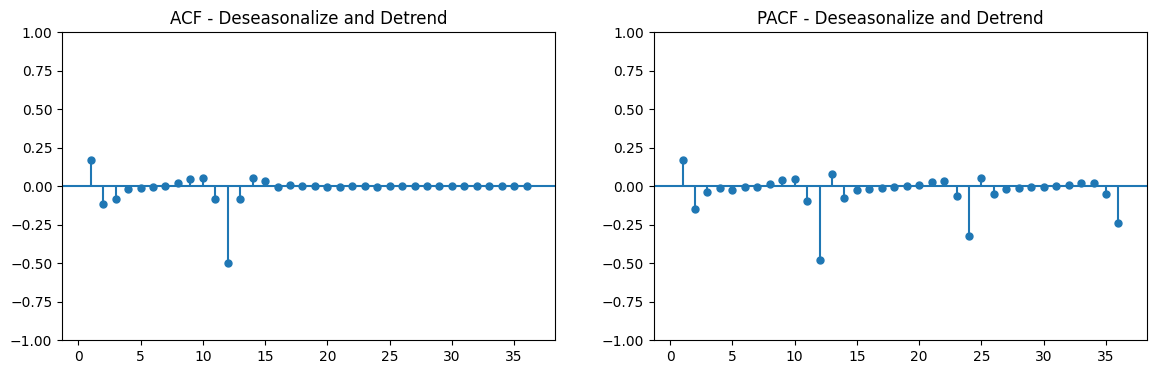

In [119]:

fig, ax = plt.subplots(1,2)

plot_acf( ts_silicon_data_dif_12_1, zero=False, lags=36, ax=ax[0], title=f'ACF - {d_desc}')
plot_pacf(ts_silicon_data_dif_12_1, zero=False, lags=36, ax=ax[1], title=f'PACF - {d_desc}')
plt.show()


[1, 12, 24, 36, 48]


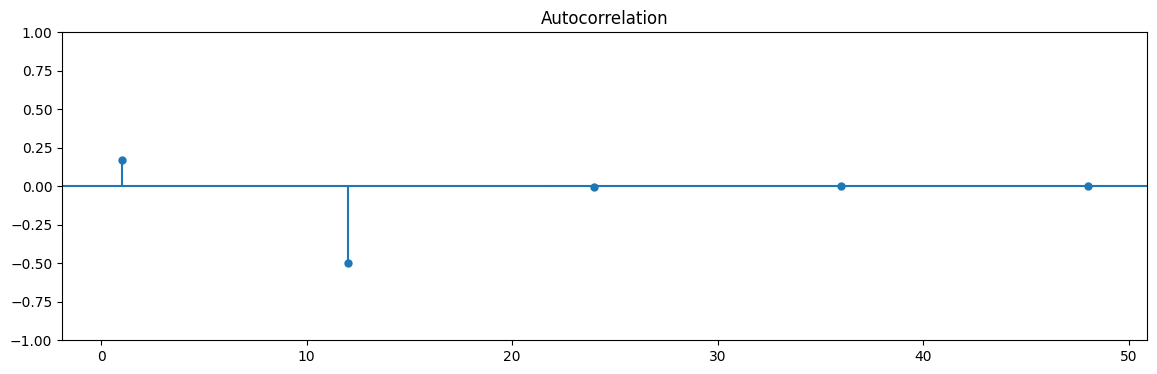

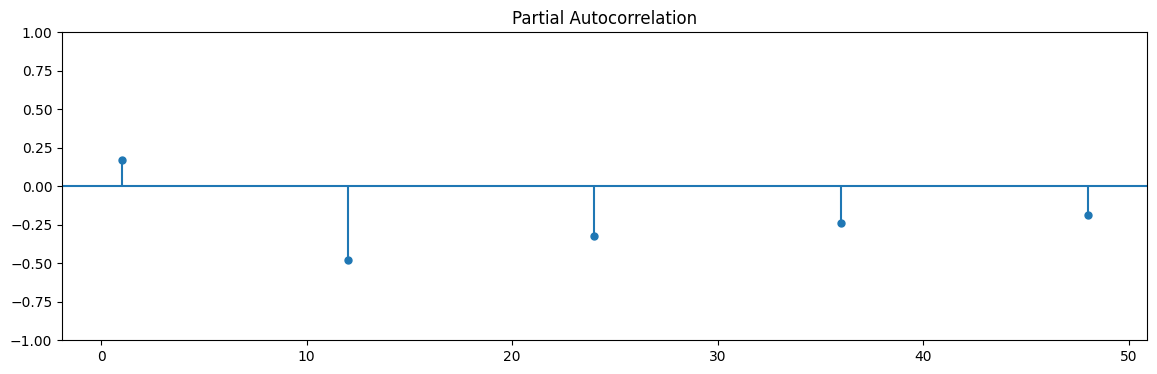

In [120]:

#lags = [1, 12, 24, 36, 48]
lags = [i for i in range(12, 60, 12)]
lags.insert(0, 1)
print(lags)

plot_acf( ts_silicon_data.diff(12).diff(1).dropna(),zero=False, lags=lags)
plot_pacf(ts_silicon_data.diff(12).diff(1).dropna(),zero=False, lags=lags);


In [121]:

## ts_silicon_data_train

sarima_model = SARIMAX(ts_silicon_data_train, 
                       order=(0,1,1),
                       seasonal_order=(0,1,1,12))

model = sarima_model.fit(disp=0)


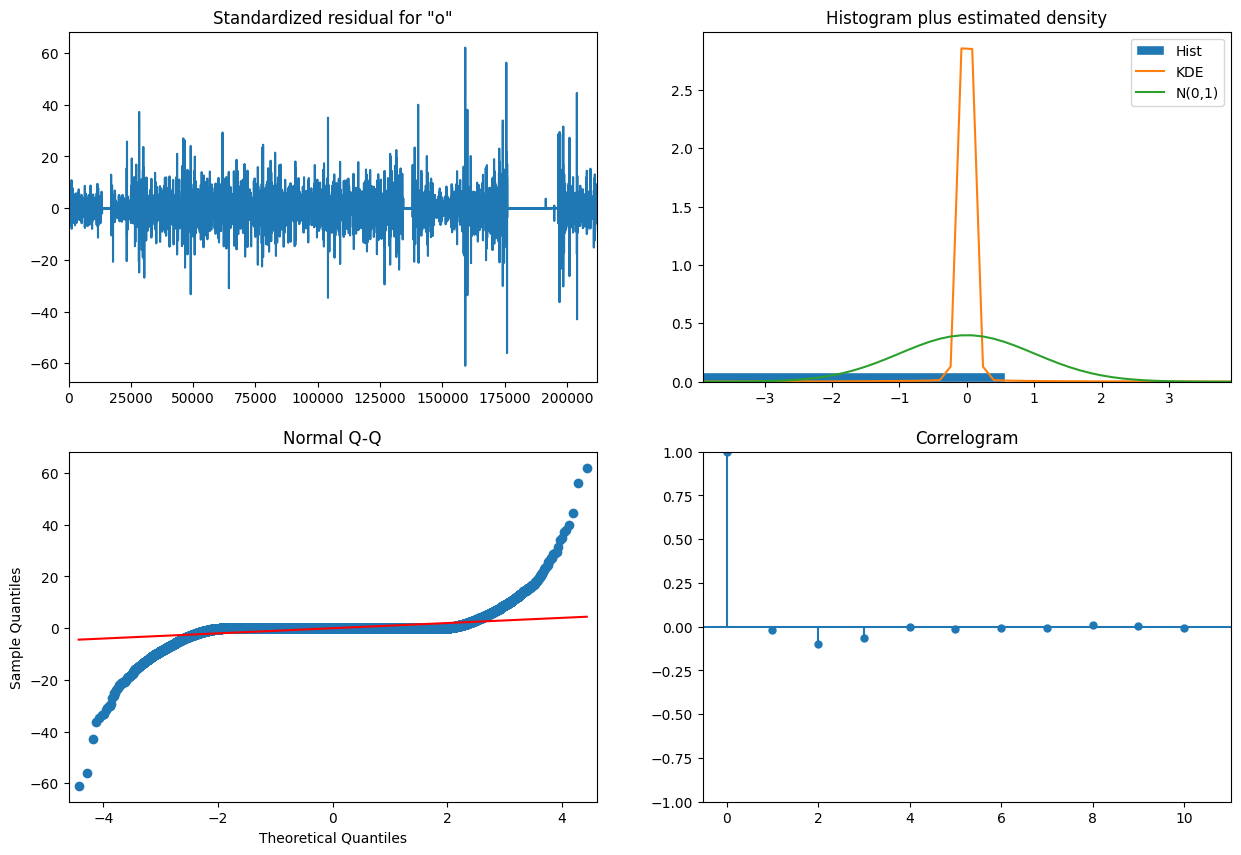

In [122]:

model.plot_diagnostics(figsize=(15,10))
# plt.savefig('images/fig_10.23.png', bbox_inches='tight', dpi=300)
plt.show()


In [123]:

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       o_SILICON_14   No. Observations:               212016
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood              489988.999
Date:                            Sat, 25 Nov 2023   AIC                        -979971.998
Time:                                    19:00:33   BIC                        -979941.204
Sample:                                         0   HQIC                       -979962.957
                                         - 212016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2061      0.000    746.817      0.000       0.206       0.207
ma.S.L12      -0.9999      0.002   -435.284      0.000      -1.004      -0.995
sigma2         0.0006   1.26e-06    457.630      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  65.32   Jarque-Bera (JB):        2258038072.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                       508.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='time'>

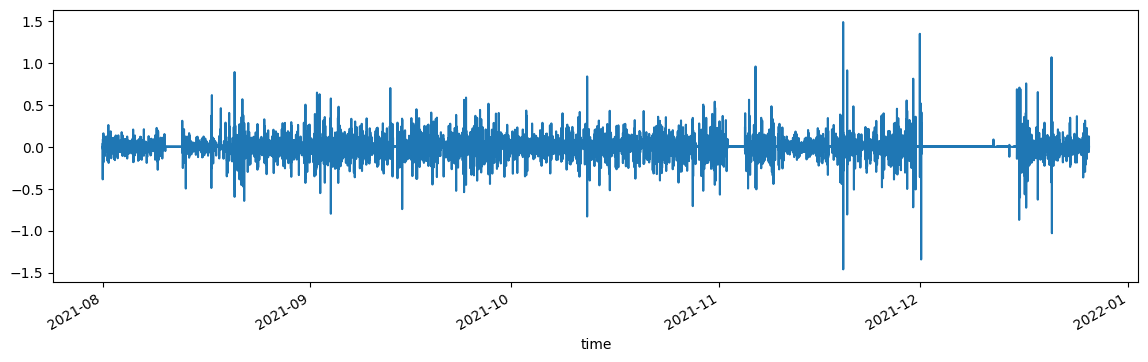

In [124]:

model.resid[1:].plot()


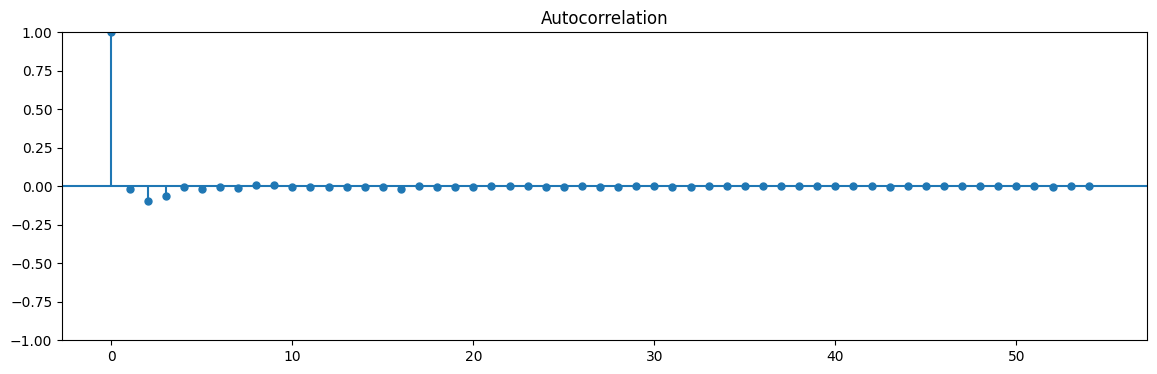

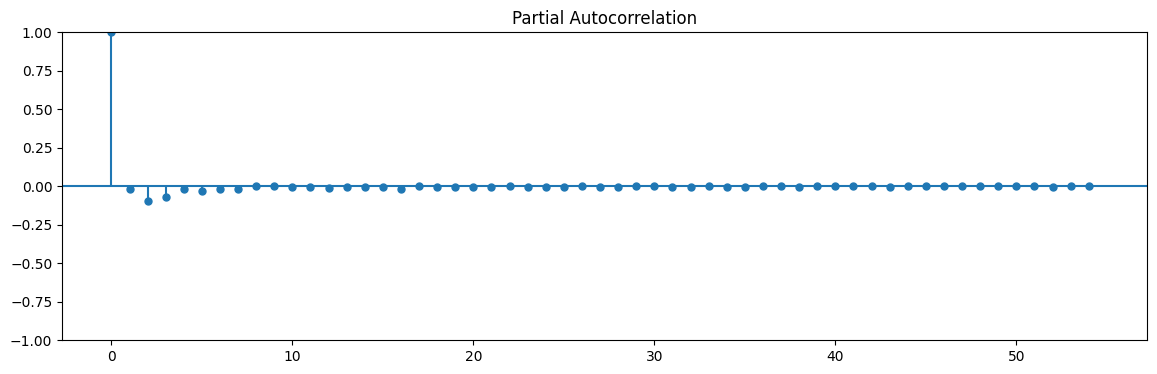

In [125]:

plot_acf( model.resid[1:])
plot_pacf(model.resid[1:]); plt.show()


<AxesSubplot:xlabel='time'>

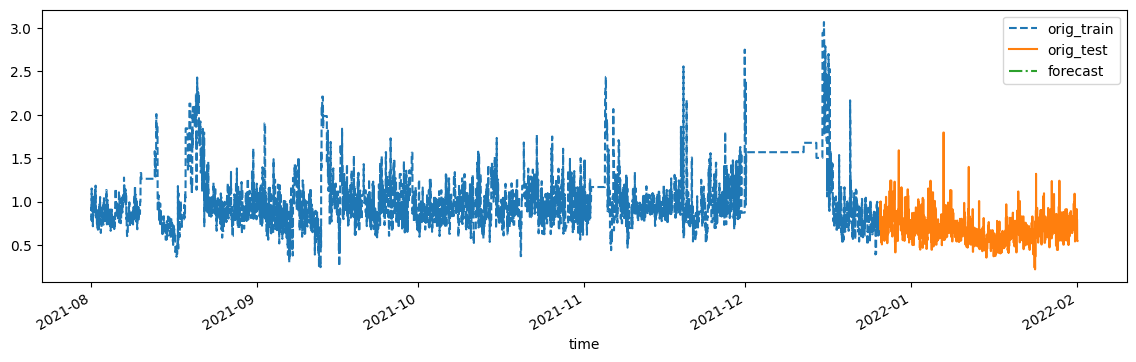

In [126]:

plot_forecast(model, '1971', ts_silicon_data_train, ts_silicon_data_test)
# plt.savefig('images/fig_10.24.png', bbox_inches='tight', dpi=300)


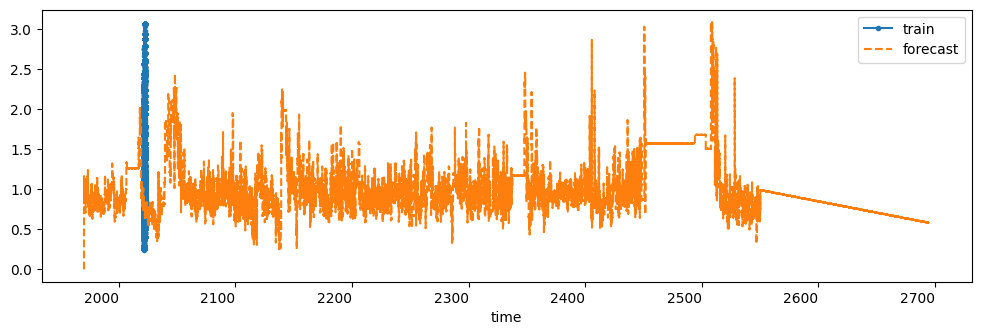

In [130]:

n = ts_silicon_data.shape[0]
ts_silicon_data_train.plot(style='.-', figsize=(12,4))
model.predict(end=n).plot(style='--')
plt.legend(['train', 'forecast'])



## SARIMAX silicon With grid search


In [1]:

%%time
P_ns, D_ns, Q_ns = [list(range(3))]*3
P_s, D_s, Q_s    = [list(range(2))]*3

vals = combinator([P_ns, D_ns, Q_ns, P_s, D_s, Q_s])
score = {}

for i, (p, d, q, P, D, Q) in enumerate(vals):
    if i%15 == 0:
        print(f'Running model #{i} using SARIMA({p},{d},{q})({P},{D},{Q},12)')
    m = SARIMAX(ts_silicon_data_train, 
                order=(p,d,q),
                seasonal_order=(P, D, Q, 12),
                enforce_stationarity=False)
    
    res = m.fit(disp=0)
    
    y = ts_silicon_data_test.values.ravel() 
    y_hat = res.forecast(steps=len(y))
    
    score[i] = {'non-seasonal order': (p,d,q),
                'seasonal order': (P, D, Q),
                'AIC':res.aic, 
                'AICc': res.aicc,
                'BIC': res.bic,
                'RMSPE': rmspe(y, y_hat),
                'RMSE' : rmse(y, y_hat),
                'MAPE' : mape(y, y_hat),
                'model': res}


NameError: name 'combinator' is not defined

In [ ]:

best_model = get_best_model(score, 'AIC')


In [ ]:

results = pd.DataFrame(score).T.sort_values(by='AIC').reset_index()
results.head(20)


In [ ]:

results = pd.DataFrame(score).T.sort_values(by='BIC').reset_index()
results.head(20)


In [ ]:

score[211]


In [ ]:

plot_forecast(best_model, '1971', ts_silicon_data_train, ts_silicon_data_test)
# plt.savefig('images/fig_10.25.png', bbox_inches='tight', dpi=300)



## CO2 book example


In [33]:

co2_df = co2.load_pandas().data
co2_df = co2_df.ffill()


<AxesSubplot:>

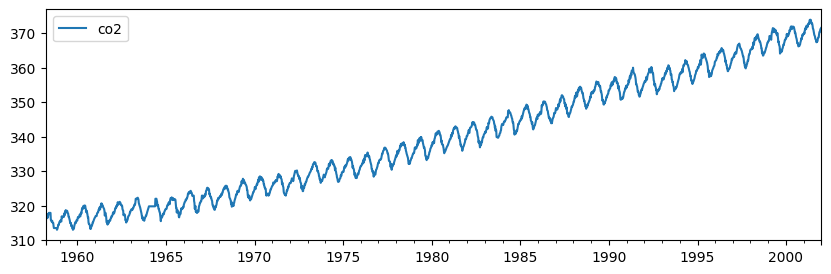

In [34]:

co2_df.plot()


In [35]:

## co2_df.hvplot()


In [36]:

co2_decomposed = seasonal_decompose(co2_df, model='additive')


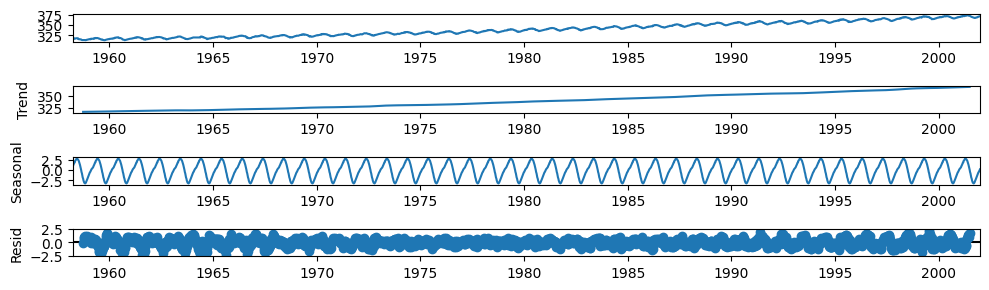

In [37]:

co2_decomposed.plot(); plt.show()


In [38]:

co2_cyclic, co2_trend = hpfilter(co2_df)


<AxesSubplot:title={'center':'CO2 Trend Component'}>

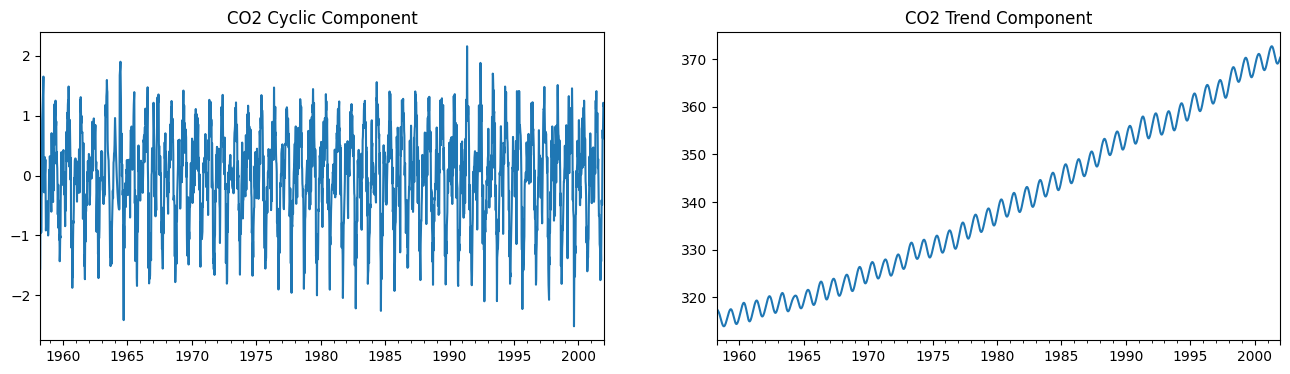

In [39]:

fig, ax = plt.subplots(1,2, figsize=(16, 4))

co2_cyclic.plot(ax=ax[0], title='CO2 Cyclic Component')
co2_trend.plot(ax=ax[1],  title='CO2 Trend Component')

#fig.savefig('images/fig_9.18.png', bbox_inches='tight')



## Air passengers example


In [40]:

air_passengers = get_rdataset("AirPassengers")
airp_df = air_passengers.data
airp_df.index = pd.date_range('1949', '1961', freq='M')
airp_df.drop(columns=['time'], inplace=True)


<AxesSubplot:>

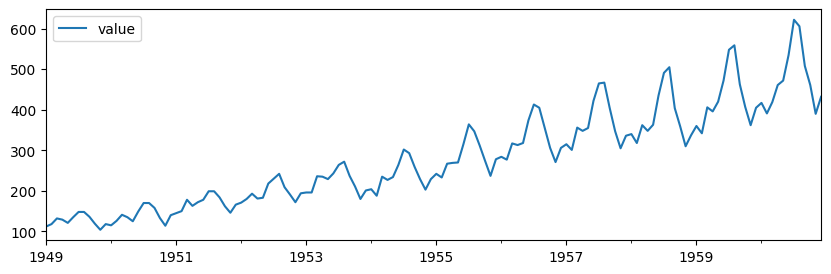

In [41]:

airp_df.plot()


In [42]:

## airp_df.hvplot()


<AxesSubplot:>

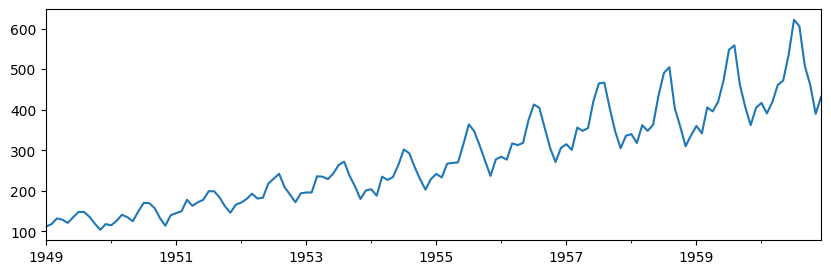

In [43]:

airp_df['value'].plot()


In [44]:

airp_df_decomposed = seasonal_decompose(airp_df, model='multiplicative')


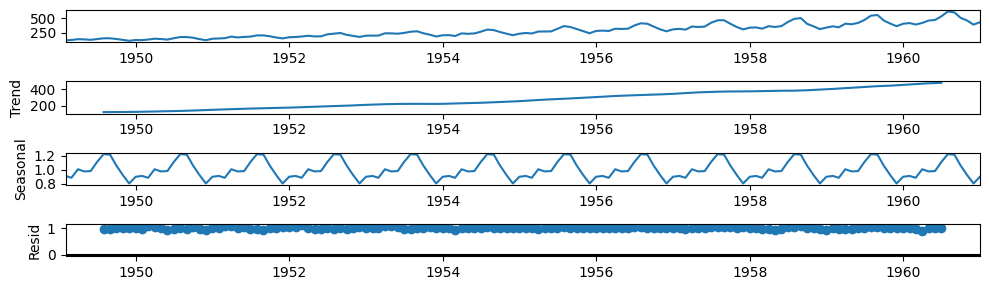

In [45]:

airp_df_decomposed.plot(); plt.show()
